In [1]:
%pylab inline
import numpy as np
import math

import gzip, pickle

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(1234)

## Question 1

In [3]:
from code.mlp_helpers import fprop, bprop
from code.verification_helpers import check_grad_w1, check_grad_b1, check_grad_w2, check_grad_b2

data = np.matrix([[12, 22, 0]])

x = data[:,:-1]
y = data[:,-1].getA1()

dh = 2
d = 2
m = 2
epsilon = 1e-5

# Initialisation des paramètres
W1 = np.random.uniform(
    -1 / math.sqrt(d),
    1 / math.sqrt(d),
    (dh, d))
b1 = np.zeros((dh, 1))

W2 = np.random.uniform(
    -1 / math.sqrt(dh),
    1 / math.sqrt(dh),
    (m, dh))
b2 = np.zeros((m, 1))

In [4]:
fprop_r = fprop(W1, W2, b1, b2, x, y)

In [5]:
bprop_r = bprop(fprop_r, W1, W2, b1, b2, x, y, m)

In [6]:
L = fprop_r['loss']

#### Verification du W2 gradient 

In [7]:
grad_w2_diff = check_grad_w2(L, W1, W2, b1, b2, x, y, epsilon)

print(grad_w2_diff)
print((bprop_r['grad_w2'] + epsilon) / (grad_w2_diff + epsilon))

[[ 0.         -7.79911931]
 [ 0.          7.79912105]]
[[ 1.          1.00000011]
 [ 1.          0.99999989]]


#### Verification du b2 gradient

In [8]:
grad_b2_diff = check_grad_b2(L, W1, W2, b1, b2, x, y, epsilon)

print(grad_b2_diff)
print((bprop_r['grad_b2'] + epsilon) / (grad_b2_diff + epsilon))

[[-0.99714118]
 [ 0.99714121]]
[[ 1.00000001]
 [ 0.99999999]]


#### Verification du W1 gradient

In [9]:
grad_w1_diff = check_grad_w1(L, W1, W2, b1, b2, x, y, epsilon)

print(grad_w1_diff)
print((bprop_r['grad_w1'] + epsilon) / (grad_w1_diff + epsilon))

[[  0.           0.        ]
 [  8.9564951   16.42024278]]
[[ 1.          1.        ]
 [ 0.99999987  0.99999976]]


#### Verification du b1 gradient

In [10]:
grad_b1_diff = check_grad_b1(L, W1, W2, b1, b2, x, y, epsilon)

print(grad_b1_diff)
print((bprop_r['grad_b1'] + epsilon) / (grad_b1_diff + epsilon))

[[ 0.       ]
 [ 0.7463745]]
[[ 1.        ]
 [ 0.99999999]]


## Question 2

In [11]:
from code.mlp import MLP

dh = 2
d = 2
m = 2
k = 1
epsilon = 1e-5
nEpoc = 1
nnet = MLP(d, m, dh, epsilon)

In [12]:
nnet.verify_gradient(x,y, k)

Gradient verified for element 0 ✓


## Questions 3 et 4

In [13]:
data = np.matrix(np.loadtxt(open('2moons.txt', 'r')))

np.random.seed(1234)

train = data[:, :-1]
target = data[:, -1].getA1()

In [14]:
dh = 2 # nb neurones
d = 2 # nb entrées
m = 2 # nb sorties
k = 10 # nb d'exemples
epsilon = 1e-5
nEpoc = 1

nnet = MLP(d, m, dh, epsilon)
nnet.verify_gradient(train, target, k)

Gradient verified for element 0 ✓
Gradient verified for element 1 ✓
Gradient verified for element 2 ✓
Gradient verified for element 3 ✓
Gradient verified for element 4 ✓
Gradient verified for element 5 ✓
Gradient verified for element 6 ✓
Gradient verified for element 7 ✓
Gradient verified for element 8 ✓
Gradient verified for element 9 ✓


## Question 5

#### Cas où on change les paramètres: 5.1 weigth decay, 5.2 nombre de neurones, 5.3 arrêt prématuré

###Cas de base

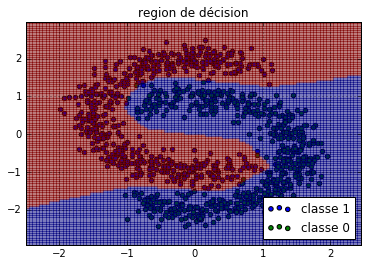

In [15]:
dh = 300
d = 2
m = 2
k = 100
iterations = 1000
epsilon = 1e-5

lamdas = np.matrix([[0.001, 0.0001],[0.001, 0.00006]])
learning_rate = 0.019

nnet = MLP(d, m, dh, epsilon)
nnet.train(train, target, lamdas, learning_rate , k, iterations=iterations)
nnet.show_decision_regions(data)

In [16]:
def model_fit(d, m, dh, epsilon, train, target, lamdas, learning_rate, data, iterations=100):
    nnet = MLP(d, m, dh, epsilon)
    nnet.train(train, target, lamdas, learning_rate, k=100, iterations=iterations)
    nnet.show_decision_regions(data, title='Question5_iterations{9}-d-{0}_m-{1}_dh-{2}_epsilon-{3}_learning_rate-{4}_lamdas-{5}-{6}-{7}-{8}'.format(d,m,dh,epsilon,learning_rate,lamdas[0,0], lamdas[0,1], lamdas[1,0], lamdas[1,1], iterations).replace('.', '~'))

#### 5.1 Effet des valeurs des weigth decay

Changement du lamda[0][0] change la position de la tige rouge en bas a gauche de la region de decision

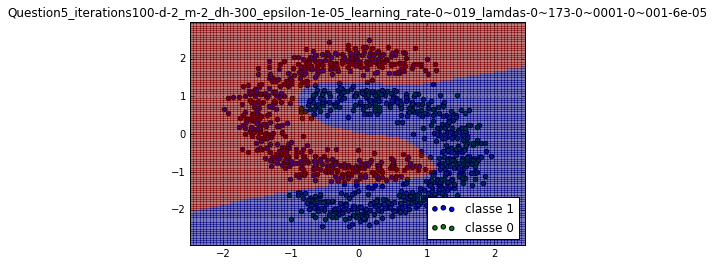

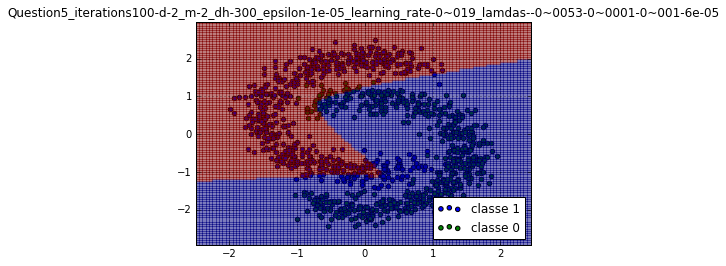

In [77]:
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.173, 0.0001],[0.001, 0.00006]]), learning_rate, data)
model_fit(d, m, dh, epsilon, train, target, np.matrix([[-0.0053, 0.0001],[0.001, 0.00006]]), learning_rate, data)

Changement du lamda[0][1] change l'epaisseur de la tige blue en haut a droite

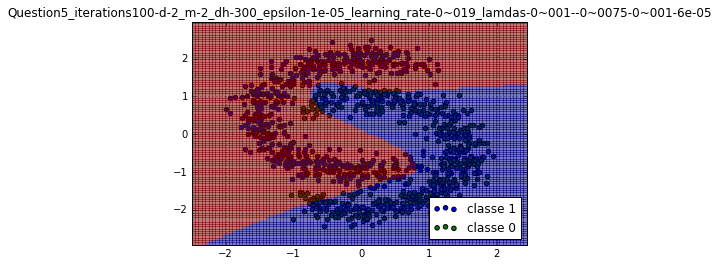

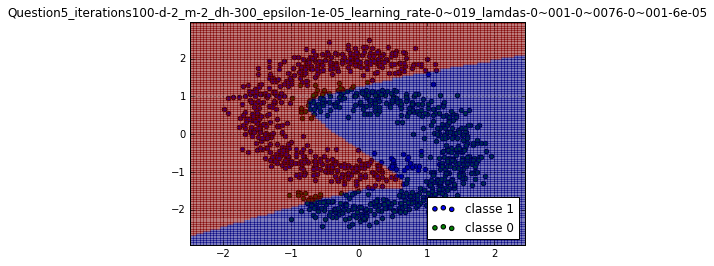

In [70]:
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.001, -0.0075],[0.001, 0.00006]]), learning_rate, data)
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.001, 0.0076],[0.001, 0.00006]]), learning_rate, data)

Changement du lamda[1][0]

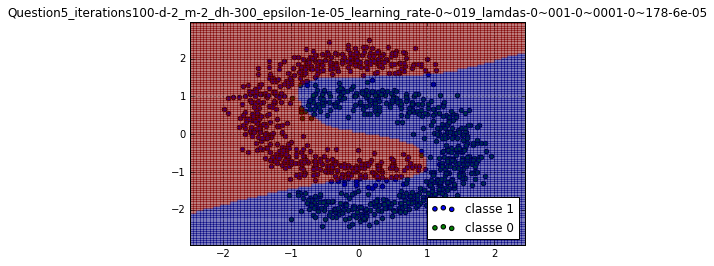

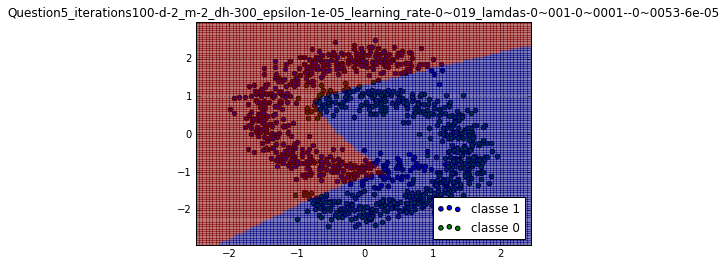

In [80]:
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.001, 0.0001],[0.178, 0.00006]]), learning_rate, data)
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.001, 0.0001],[-0.0053, 0.00006]]), learning_rate, data)

Changement du lamda[1][1] change l'emplacement de la tige rouge enbas a gauche

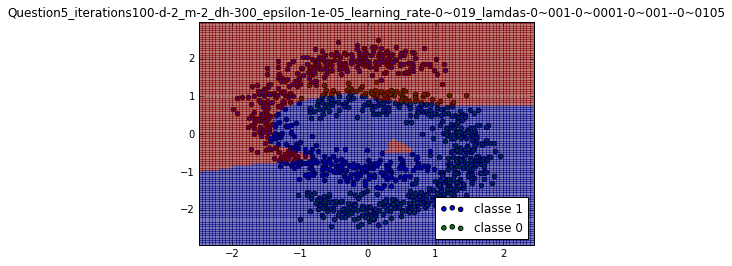

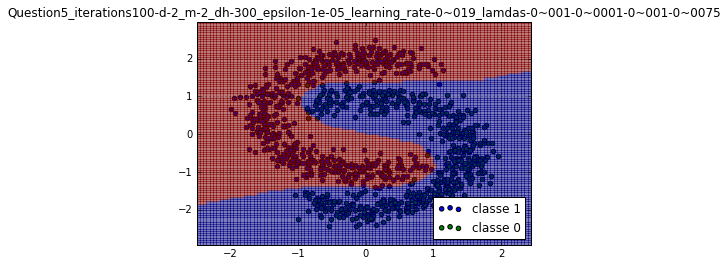

In [87]:
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.001, 0.0001],[0.001, -0.0105]]), learning_rate, data)
model_fit(d, m, dh, epsilon, train, target, np.matrix([[0.001, 0.0001],[0.001, 0.0075]]), learning_rate, data)

#### 5.2 Effet du nombre de neurones de la couche cachee

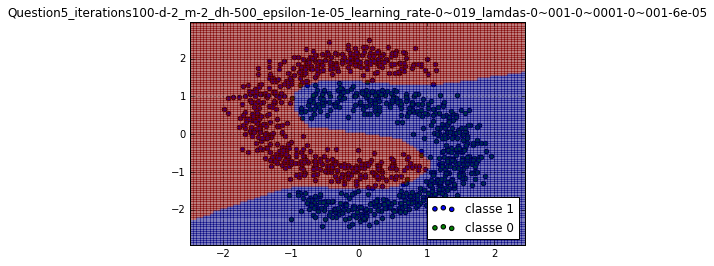

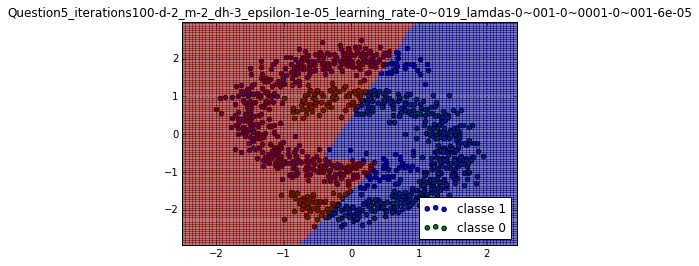

In [91]:
model_fit(d, m, 500, epsilon, train, target, lamdas, learning_rate, data)
model_fit(d, m, 3, epsilon, train, target, lamdas, learning_rate, data)

####5.3 Effet d'arrêts prématurés

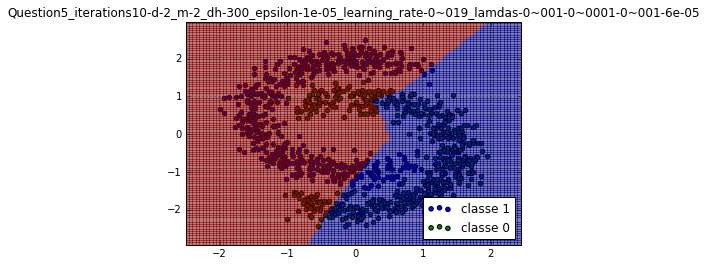

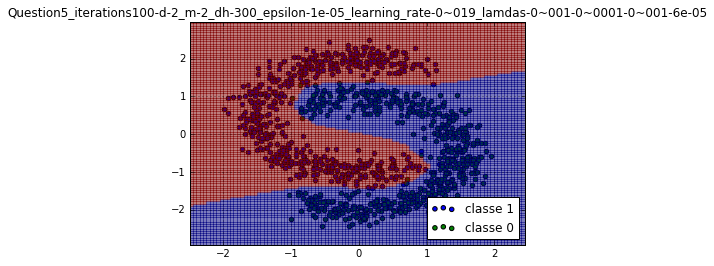

In [19]:
model_fit(d, m, dh, epsilon, train, target, lamdas, learning_rate, data, iterations=10)
model_fit(d, m, dh, epsilon, train, target, lamdas, learning_rate, data, iterations=100)

## Question 6

Question 6: Processus d'adaptation en lots de K exemples:
1. Ancienne méthode: chaque exemple est pris et traité individuellement par fprop et bprop
        for i in list(range(train.shape[0])):
           x = train[i]  # dimension = 1 X 2
           y = target[i] # dimension = 1 X 1
            
           fprop_r = fprop(self.W1, self.W2, self.b1, self.b2, x, y) # ha = 1 X 1, hs = 1 X 1, os = 1 X 1, oa = 1 X 1, loss = 1
           
           retour de fprop =  return {
                                    'ha': ha,
                                    'hs': hs,
                                    'oa': oa,
                                    'os': os,
                                    'loss': loss
                                    }
           
           bprop_r = bprop(fprop_r, self.W1, self.W2, self.b1, self.b2, x, y, self.m) # tous des scalaires
           
           retour de bprop = return {
                                      'grad_w1': grad_w1,
                                      'grad_b1': grad_b1,
                                      'grad_ha': grad_ha,
                                      'grad_hs': grad_hs,
                                      'grad_w2': grad_w2,
                                      'grad_b2': grad_b2,
                                      'grad_oa': grad_oa
                                        }
           

2. Nouvelle méthode: l'ensemble d'exemples est divisé est (nb d'exemples total/K) batch de K exemples, chacun étant par la suite traité par fprop et bprop 
        split_indices = list(range(k, train.shape[0], k))
        train_splits = np.split(train, split_indices)
        target_splits = np.split(target, split_indices)
        for i in list(range(0, len(train_splits) - 1, 1)):
            x = train_splits[i] # dimension = k X 2
            y = target_splits[i] # dimension = k X 1
            
        fprop_r = fprop(self.W1, self.W2, self.b1, self.b2, x, y) # ha = k X 1, hs = k X 1, os = k X 1, oa = k X 1, loss = 1
        
                retour de fprop =  return {
                                            'ha': ha,
                                            'hs': hs,
                                            'oa': oa,
                                            'os': os,
                                            'loss': loss
                                            }       
        
        bprop_r = bprop(fprop_r, self.W1, self.W2, self.b1, self.b2, x, y, self.m) # tous des scalaires
        
                retour de bprop = return {
                                      'grad_w1': grad_w1,
                                      'grad_b1': grad_b1,
                                      'grad_ha': grad_ha,
                                      'grad_hs': grad_hs,
                                      'grad_w2': grad_w2,
                                      'grad_b2': grad_b2,
                                      'grad_oa': grad_oa
                                        }


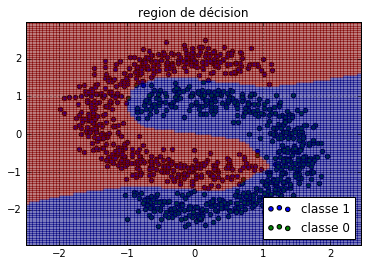

In [20]:
from code.mlp_batch import MLPBatch

dh = 300
d = 2
m = 2
k = 100
iterations = 1000
epsilon = 1e-5

lamdas = np.matrix([[0.001, 0.0001],[0.001, 0.00006]])
learning_rate = 0.019

nnet_batch = MLPBatch(d, m, dh, epsilon)
nnet_batch.train(train, target, lamdas, learning_rate , k, iterations=iterations)
nnet_batch.show_decision_regions(data)

## Question 7

Pour k=1 les gradients total so presque égales

======> K 10: 

1.1844691894e-14
2.152575281e-14


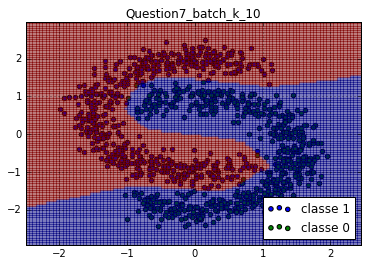

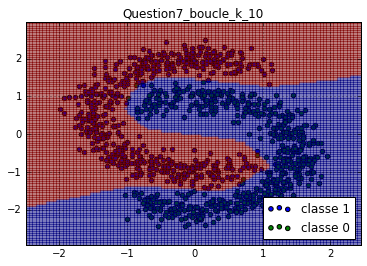

In [21]:
nnet_batch_k_10 = MLPBatch(d, m, dh, epsilon)
nnet_k_10 = MLP(d, m, dh, epsilon)

nnet_k_10.W1 = nnet_batch_k_10.W1.copy()
nnet_k_10.W2 = nnet_batch_k_10.W2.copy()
nnet_k_10.b1 = nnet_batch_k_10.b1.copy()
nnet_k_10.b2 = nnet_batch_k_10.b2.copy()

nnet_batch_k_10.train(train, target, lamdas, learning_rate, k, iterations=iterations)
nnet_batch_k_10.show_decision_regions(data, title='Question7_batch_k_10')

nnet_k_10.train(train, target, lamdas, learning_rate, k, iterations=iterations)
nnet_k_10.show_decision_regions(data, title='Question7_boucle_k_10')

print('======> K 10: \n')
print(nnet_batch_k_10.total_grad)
print(nnet_k_10.total_grad)

======> K 1: 

6.73121497777e-15
1.34624299555e-14


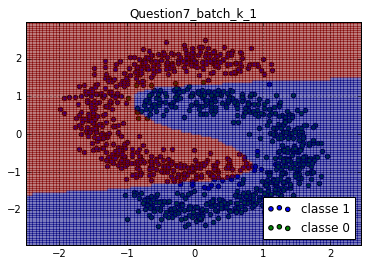

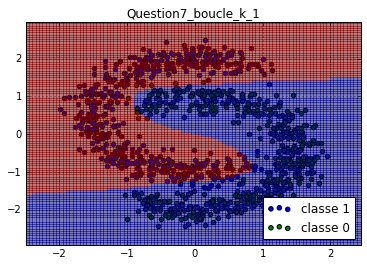

In [22]:
iterations=5000

nnet_batch_k_1 = MLPBatch(d, m, dh, epsilon)
nnet_k_1 = MLP(d, m, dh, epsilon)

nnet_k_1.W1 = nnet_batch_k_1.W1.copy()
nnet_k_1.W2 = nnet_batch_k_1.W2.copy()
nnet_k_1.b1 = nnet_batch_k_1.b1.copy()
nnet_k_1.b2 = nnet_batch_k_1.b2.copy()

nnet_batch_k_1.train(train, target, lamdas, learning_rate, 1, iterations=iterations)
nnet_batch_k_1.show_decision_regions(data, title='Question7_batch_k_1')

nnet_k_1.train(train, target, lamdas, learning_rate, 1, iterations=iterations)
nnet_k_1.show_decision_regions(data, title='Question7_boucle_k_1')

print('======> K 1: \n')
print(nnet_batch_k_1.total_grad)
print(nnet_k_1.total_grad)